# DLBCL CLASSIFICATION USING GENE EXPRESSION DATA

In [1]:
import pandas as pd
data = pd.read_csv('DLBCL.csv')

In [2]:
data.head()

Type  A28102  AB000114_at  AB000115_at  AB000220_at  AB000409_at  \
0  DLBCL      -1          -45          176           97          -57   
1  DLBCL      25          -17          531          353          122   
2  DLBCL      73           91          257           80          614   
3  DLBCL     267           41          202          138          198   
4  DLBCL      16           24          187           39          145   

   AB000449_at  AB000450_at  AB000460_at  AB000462_at  ...  U48730_at  \
0          233          265          945           56  ...        132   
1          155          209         1688           42  ...        147   
2          507          760         2252          196  ...        169   
3          355          245         1469          170  ...         13   
4          254          571          930          -11  ...         69   

   U58516_at  U73738_at  X06956_at  X16699_at  X83863_at  Z17240_at  \
0       1036       -161       1523        -72        897        366   
1       4254        -75       6056        -68        737         81   
2       1934       -129       2901         -9        946        450   
3       2469         93       2465       -119        339        321   
4        608        -39       1667        -87        721        213   

   L49218_f_at  M71243_f_at  Z78285_f_at  
0            3           76          -28  
1           -4           41          -45  
2           38          164          -62  
3          -63           73          -13  
4           15          155          -26  

[5 rows x 7071 columns]

In [3]:
print(data.values)

[['DLBCL' -1 -45 ... 3 76 -28]
 ['DLBCL' 25 -17 ... -4 41 -45]
 ['DLBCL' 73 91 ... 38 164 -62]
 ...
 ['FL' 83 -63 ... -221 -213 -318]
 ['FL' 27 -194 ... -97 -120 -291]
 ['FL' 3 123 ... -1 370 -53]]


In [4]:
data.head()

Type  A28102  AB000114_at  AB000115_at  AB000220_at  AB000409_at  \
0  DLBCL      -1          -45          176           97          -57   
1  DLBCL      25          -17          531          353          122   
2  DLBCL      73           91          257           80          614   
3  DLBCL     267           41          202          138          198   
4  DLBCL      16           24          187           39          145   

   AB000449_at  AB000450_at  AB000460_at  AB000462_at  ...  U48730_at  \
0          233          265          945           56  ...        132   
1          155          209         1688           42  ...        147   
2          507          760         2252          196  ...        169   
3          355          245         1469          170  ...         13   
4          254          571          930          -11  ...         69   

   U58516_at  U73738_at  X06956_at  X16699_at  X83863_at  Z17240_at  \
0       1036       -161       1523        -72        897        366   
1       4254        -75       6056        -68        737         81   
2       1934       -129       2901         -9        946        450   
3       2469         93       2465       -119        339        321   
4        608        -39       1667        -87        721        213   

   L49218_f_at  M71243_f_at  Z78285_f_at  
0            3           76          -28  
1           -4           41          -45  
2           38          164          -62  
3          -63           73          -13  
4           15          155          -26  

[5 rows x 7071 columns]

## Checking to see if there is any missing values or not

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Columns: 7071 entries, Type to Z78285_f_at
dtypes: int64(7070), object(1)
memory usage: 4.2+ MB


In [6]:
data.describe()

A28102  AB000114_at  AB000115_at  AB000220_at  AB000409_at  \
count    77.000000    77.000000    77.000000    77.000000    77.000000   
mean    117.467532     1.675325   439.844156   191.285714   156.285714   
std     163.165769   160.380587   615.331662   167.230841   265.196047   
min    -136.000000  -965.000000    34.000000     2.000000  -334.000000   
25%      23.000000   -22.000000   197.000000    88.000000   -38.000000   
50%      84.000000    19.000000   298.000000   132.000000   153.000000   
75%     146.000000    60.000000   486.000000   231.000000   361.000000   
max    1017.000000   464.000000  5283.000000   898.000000  1225.000000   

       AB000449_at  AB000450_at  AB000460_at  AB000462_at  AB000464_at  ...  \
count    77.000000    77.000000    77.000000    77.000000    77.000000  ...   
mean    351.818182   331.194805  1579.051948   141.272727   714.584416  ...   
std     262.099706   226.761876   813.137975   222.960206   492.225995  ...   
min     -99.000000    10.000000   557.000000  -131.000000   138.000000  ...   
25%     177.000000   181.000000  1182.000000    56.000000   387.000000  ...   
50%     286.000000   265.000000  1421.000000    93.000000   615.000000  ...   
75%     481.000000   406.000000  1720.000000   169.000000   863.000000  ...   
max    1290.000000  1176.000000  7152.000000  1802.000000  2940.000000  ...   

        U48730_at    U58516_at    U73738_at     X06956_at    X16699_at  \
count   77.000000    77.000000    77.000000     77.000000    77.000000   
mean   193.792208  1288.155844  -224.831169   1924.688312  -220.649351   
std    132.363270   899.104029   338.030612   2149.767969   287.278554   
min    -57.000000   258.000000 -2017.000000   -738.000000 -1687.000000   
25%    101.000000   713.000000  -273.000000    572.000000  -263.000000   
50%    170.000000  1038.000000  -123.000000   1165.000000  -111.000000   
75%    255.000000  1499.000000   -23.000000   2465.000000   -63.000000   
max    635.000000  5936.000000    93.000000  11906.000000    -2.000000   

         X83863_at    Z17240_at  L49218_f_at  M71243_f_at  Z78285_f_at  
count    77.000000    77.000000    77.000000    77.000000    77.000000  
mean    787.350649   249.142857  -132.792208    26.805195  -195.337662  
std     778.563873   305.609775   263.358038   239.679229   288.071154  
min     -75.000000  -661.000000 -1375.000000 -1332.000000 -1729.000000  
25%     384.000000    87.000000  -243.000000   -22.000000  -281.000000  
50%     676.000000   263.000000   -22.000000    73.000000   -78.000000  
75%    1024.000000   409.000000    11.000000   155.000000   -42.000000  
max    6465.000000  1193.000000   152.000000   592.000000     3.000000  

[8 rows x 7070 columns]

## Replacing categorical values with numaric value 

In [7]:
data['Type'] = data['Type'].replace(['DLBCL', 'FL'],[0, 1])

In [8]:
print(data.values)

[[   0   -1  -45 ...    3   76  -28]
 [   0   25  -17 ...   -4   41  -45]
 [   0   73   91 ...   38  164  -62]
 ...
 [   1   83  -63 ... -221 -213 -318]
 [   1   27 -194 ...  -97 -120 -291]
 [   1    3  123 ...   -1  370  -53]]


# Feature Extraction using Pearson's Correlation

In [9]:
data_new = data.drop(columns = "Type", axis = 1, inplace = False)

data_new.head()

A28102  AB000114_at  AB000115_at  AB000220_at  AB000409_at  AB000449_at  \
0      -1          -45          176           97          -57          233   
1      25          -17          531          353          122          155   
2      73           91          257           80          614          507   
3     267           41          202          138          198          355   
4      16           24          187           39          145          254   

   AB000450_at  AB000460_at  AB000462_at  AB000464_at  ...  U48730_at  \
0          265          945           56          819  ...        132   
1          209         1688           42          639  ...        147   
2          760         2252          196          863  ...        169   
3          245         1469          170          384  ...         13   
4          571          930          -11          439  ...         69   

   U58516_at  U73738_at  X06956_at  X16699_at  X83863_at  Z17240_at  \
0       1036       -161       1523        -72        897        366   
1       4254        -75       6056        -68        737         81   
2       1934       -129       2901         -9        946        450   
3       2469         93       2465       -119        339        321   
4        608        -39       1667        -87        721        213   

   L49218_f_at  M71243_f_at  Z78285_f_at  
0            3           76          -28  
1           -4           41          -45  
2           38          164          -62  
3          -63           73          -13  
4           15          155          -26  

[5 rows x 7070 columns]

In [10]:
corr_matrix = data.corr()
corr = corr_matrix['Type'].sort_values(ascending=False)[:21]
corr = corr * 100
corr

Type                100.000000
X16983_at            58.751652
AB002409_at          57.546523
Z21966_at            54.472874
D87119_at            52.681907
Z11793_at            51.674322
U46006_s_at          50.845247
L27071_at            49.538533
L42324_at            49.420966
U56102_at            48.766805
HG3928-HT4198_at     48.301638
M59829_at            48.083571
M37815_cds1_at       47.874228
S73591_at            47.655593
L19314_at            46.522513
U61262_at            46.441291
X86098_at            46.298243
M63379_at            46.107133
Z30426_at            46.104760
X85785_rna1_at       46.023899
Z35227_at            45.975976
Name: Type, dtype: float64

In [11]:
corr.plot(kind = 'bar')

<AxesSubplot:>

In [12]:
# feature selection as mentioned in the research paper (top 100 radviz visualizations with 8 attributes)

# list_gene = list(corr.index)

list_gene = ['Type',
'X16983_at',
'X02152_at',
'M94880_f_at',
'Z21966_at',
'J03909_at',
'D87119_at',
'HG417-HT417_s_at',
'M22382_at',
'L17131_rna1_at',
'L42324_at',
'X56494_at',
'M63138_at',
'Z11793_at',
'D82348_at',
'AB002409_at',
'HG1980-HT2023_at',
'M14328_s_at',
'J04173_at',
'X03689_s_at',
'D78134_at']


data_new = data[list_gene]

data_new.head()

Type  X16983_at  X02152_at  M94880_f_at  Z21966_at  J03909_at  D87119_at  \
0     0         42      14742         8233        156       6921        318   
1     0         12      12641        14754        -12      10405       1071   
2     0         30      12730        15725        -48       8512       1013   
3     0        -43       9872         9551        -73      10594        922   
4     0         80      18742         5489        -82        824        692   

   HG417-HT417_s_at  M22382_at  L17131_rna1_at  ...  X56494_at  M63138_at  \
0              7502       5161            4413  ...       7578       5011   
1             16768       5962           10383  ...      11102      13372   
2             19206       8218            9152  ...      11284      11535   
3             10944       6911            3800  ...       9979      10640   
4              7238      16467            3905  ...       4553       2654   

   Z11793_at  D82348_at  AB002409_at  HG1980-HT2023_at  M14328_s_at  \
0        241       1494           -6              4351        12813   
1       1861       3449          226              8607        13190   
2        690       3889          275             11118        13540   
3        825       3380           89              9791        17157   
4        259       3890          -17              6162        12063   

   J04173_at  X03689_s_at  D78134_at  
0       8286        22040       2072  
1       6669          506       3468  
2       7782        12267       3177  
3       9196         3392       1674  
4       9711         6962       1180  

[5 rows x 21 columns]

In [13]:
data_new.shape

(77, 21)

In [14]:
# Correlation plotting of the 20 highest attributes using Pearson Correlation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))
cor = data_new.drop("Type", axis = 1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# CASE 1: Using 50% of the dataset as training set and 50% of the dataset as test set.

# 1.0.Train-Test Split (50:50)

In [15]:
from sklearn.model_selection import train_test_split
train_set_1, test_set_1 = train_test_split(data_new, train_size = 0.51, random_state = 42)

In [16]:
print(f"Rows in train set: {len(train_set_1)}\nRows in test set: {len(test_set_1)}")

Rows in train set: 39
Rows in test set: 38


In [17]:
train_set_1.head()

Type  X16983_at  X02152_at  M94880_f_at  Z21966_at  J03909_at  D87119_at  \
55     0         33       4228         9733         67       2035        475   
3      0        -43       9872         9551        -73      10594        922   
17     0         36      14990        10862        211       5793        177   
38     0        -61       3713        10249       -293       9215        858   
8      0         24       9841         5392        181       4577        228   

    HG417-HT417_s_at  M22382_at  L17131_rna1_at  ...  X56494_at  M63138_at  \
55              4621       2510            3650  ...       2175       1955   
3              10944       6911            3800  ...       9979      10640   
17              7341      10672            5526  ...      10938       3836   
38             13423       2619            3361  ...       6623      11055   
8               6111      10971           10917  ...       7082       6837   

    Z11793_at  D82348_at  AB002409_at  HG1980-HT2023_at  M14328_s_at  \
55       1307        636          557              2248         2517   
3         825       3380           89              9791        17157   
17        523       2973          301              4223         9469   
38        349       1615          896              3820         8849   
8         449       7795          426             13893        12390   

    J04173_at  X03689_s_at  D78134_at  
55       3800        22224       1233  
3        9196         3392       1674  
17       9195        23295       1503  
38       3401          861       2304  
8       11000         -482       4040  

[5 rows x 21 columns]

In [18]:
test_set_1.head()

Type  X16983_at  X02152_at  M94880_f_at  Z21966_at  J03909_at  D87119_at  \
4      0         80      18742         5489        -82        824        692   
35     0        113       7207        20028         81      11354        802   
10     0          3       6672         2532        -95       1340        258   
0      0         42      14742         8233        156       6921        318   
45     0        330      19547        15254        -37      10261       3355   

    HG417-HT417_s_at  M22382_at  L17131_rna1_at  ...  X56494_at  M63138_at  \
4               7238      16467            3905  ...       4553       2654   
35             20974       4598            4008  ...       6341      15733   
10              2516      10123           10767  ...       9058       6016   
0               7502       5161            4413  ...       7578       5011   
45             14348      12552           10482  ...      13529       5137   

    Z11793_at  D82348_at  AB002409_at  HG1980-HT2023_at  M14328_s_at  \
4         259       3890          -17              6162        12063   
35       1972       1437         3966              3193        13687   
10        278       5578          199             11882        13887   
0         241       1494           -6              4351        12813   
45       3811       3322         3150             10605        14153   

    J04173_at  X03689_s_at  D78134_at  
4        9711         6962       1180  
35       5876        21195       3751  
10       6986         4657       3410  
0        8286        22040       2072  
45      14080        23908       5293  

[5 rows x 21 columns]

In [19]:
X_train_1 = train_set_1.drop("Type", axis = 1)
y_train_1 = train_set_1["Type"]
X_test_1 = test_set_1.drop("Type", axis = 1)
y_test_1 = test_set_1["Type"]

# 1.1.Confusion Matrix Heatmap of perfect predictions

In [20]:
labels = ["DLBCL", "FL"]

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

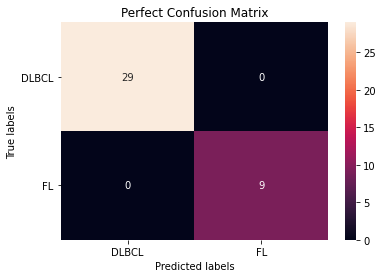

In [22]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_1, y_test_1), ax = ax, annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Perfect Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# 1.2.Using Logistic Regression model

In [23]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(solver='lbfgs', max_iter=400)
model_1.fit(X_train_1, y_train_1)

LogisticRegression(max_iter=400)

In [24]:
lr_score_1 = model_1.score(X_train_1, y_train_1)

In [25]:
print(f"Score: {round((lr_score_1*100), 2)}%")

Score: 100.0%


In [26]:
y_test_pred_1 = model_1.predict(X_test_1)

## 1.2.1.Accuracy, Precision_score, Recall_score, F1_score of the Logistic Regressor

In [27]:
print(f"Accuracy: {round((accuracy_score(y_test_1, y_test_pred_1)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_1, y_test_pred_1)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_1, y_test_pred_1)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_1, y_test_pred_1)*100), 2)}%")

Accuracy: 92.11%
Precision: 75.0%
Recall: 100.0%
F1_score: 85.71%


## 1.2.2.Classification Report of the Logistic Regressor

In [28]:
print(classification_report(y_test_1, y_test_pred_1))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        29
           1       0.75      1.00      0.86         9

    accuracy                           0.92        38
   macro avg       0.88      0.95      0.90        38
weighted avg       0.94      0.92      0.92        38



## 1.2.3.Confusion Matrix Heatmap of the Logistic Regressor

In [29]:
confusion_matrix(y_test_1, y_test_pred_1)

array([[26,  3],
       [ 0,  9]], dtype=int64)

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

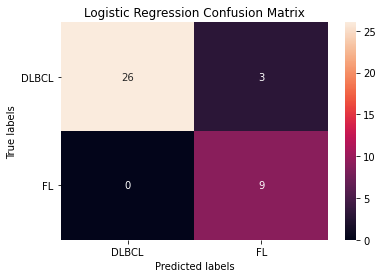

In [30]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_1, y_test_pred_1), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# 1.3.Using SVM model

In [31]:
from sklearn.svm import SVC
svm_clf_1 = SVC()
svm_clf_1.fit(X_train_1, y_train_1)

SVC()

In [32]:
svm_score_1 = svm_clf_1.score(X_train_1, y_train_1)

In [33]:
print(f"Score: {round((svm_score_1*100), 2)}%")

Score: 94.87%


In [34]:
y_test_pred_11 = svm_clf_1.predict(X_test_1)

## 1.3.1.Accuracy, Precision_score, Recall_score, F1_score of the SVM model

In [35]:
print(f"Accuracy: {round((accuracy_score(y_test_1, y_test_pred_11)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_1, y_test_pred_11)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_1, y_test_pred_11)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_1, y_test_pred_11)*100), 2)}%")

Accuracy: 94.74%
Precision: 81.82%
Recall: 100.0%
F1_score: 90.0%


## 1.3.2.Classification Report of the SVM model

In [36]:
print(classification_report(y_test_1, y_test_pred_11))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.82      1.00      0.90         9

    accuracy                           0.95        38
   macro avg       0.91      0.97      0.93        38
weighted avg       0.96      0.95      0.95        38



## 1.3.3.Confusion Matrix Heatmap of the SVM model

In [37]:
confusion_matrix(y_test_1, y_test_pred_11)

array([[27,  2],
       [ 0,  9]], dtype=int64)

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

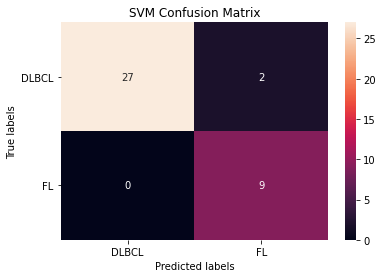

In [38]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_1, y_test_pred_11), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVM Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# 1.4.Using Naive Bayes model

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb_1 = GaussianNB()
gnb_1.fit(X_train_1, y_train_1)

GaussianNB()

In [40]:
gnb_score_1 = gnb_1.score(X_train_1, y_train_1)

In [41]:
print(f"Score: {round((gnb_score_1*100), 2)}%")

Score: 97.44%


In [42]:
y_test_pred_12 = gnb_1.predict(X_test_1)

## 1.4.1.Accuracy, Precision_score, Recall_score, F1_score of the Naive Bayes model

In [43]:
print(f"Accuracy: {round((accuracy_score(y_test_1, y_test_pred_12)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_1, y_test_pred_12)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_1, y_test_pred_12)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_1, y_test_pred_12)*100), 2)}%")

Accuracy: 94.74%
Precision: 81.82%
Recall: 100.0%
F1_score: 90.0%


## 1.4.2.Classification Report of the Naive Bayes model

In [44]:
print(classification_report(y_test_1, y_test_pred_12))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.82      1.00      0.90         9

    accuracy                           0.95        38
   macro avg       0.91      0.97      0.93        38
weighted avg       0.96      0.95      0.95        38



## 1.4.3.Confusion Matrix Heatmap of the Naive Bayes model

In [45]:
confusion_matrix(y_test_1, y_test_pred_12)

array([[27,  2],
       [ 0,  9]], dtype=int64)

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

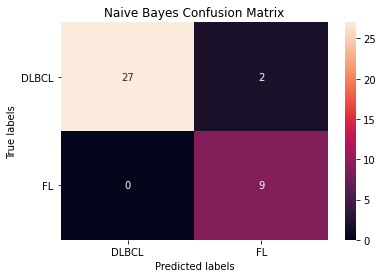

In [46]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_1, y_test_pred_12), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Naive Bayes Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# 1.5.Using XGBoost model

In [47]:
from xgboost import XGBClassifier
xgb_clf_1 = XGBClassifier(use_label_encoder = False, eval_metric='mlogloss')
xgb_clf_1.fit(X_train_1, y_train_1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [48]:
xgb_score_1 = xgb_clf_1.score(X_train_1, y_train_1)

In [49]:
print(f"Score: {round((xgb_score_1*100), 2)}%")

Score: 100.0%


In [50]:
y_test_pred_13 = xgb_clf_1.predict(X_test_1)

## 1.5.1.Accuracy, Precision_score, Recall_score, F1_score of the XGBoost model

In [51]:
print(f"Accuracy: {round((accuracy_score(y_test_1, y_test_pred_13)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_1, y_test_pred_13)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_1, y_test_pred_13)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_1, y_test_pred_13)*100), 2)}%")

Accuracy: 73.68%
Precision: 44.44%
Recall: 44.44%
F1_score: 44.44%


## 1.5.2.Classification Report of the XGBoost model

In [52]:
print(classification_report(y_test_1, y_test_pred_13))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.44      0.44      0.44         9

    accuracy                           0.74        38
   macro avg       0.64      0.64      0.64        38
weighted avg       0.74      0.74      0.74        38



## 1.5.3.Confusion Matrix Heatmap of the XGBoost model

In [53]:
confusion_matrix(y_test_1, y_test_pred_13)

array([[24,  5],
       [ 5,  4]], dtype=int64)

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

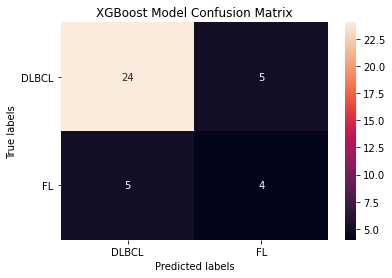

In [54]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_1, y_test_pred_13), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('XGBoost Model Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# 1.6.Using Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf_1 = RandomForestClassifier(max_depth = 2, random_state = 0)
rfc_clf_1.fit(X_train_1, y_train_1)

RandomForestClassifier(max_depth=2, random_state=0)

In [56]:
rfc_score_1 = rfc_clf_1.score(X_train_1, y_train_1)

In [57]:
print(f"Score: {round((rfc_score_1*100), 2)}%")

Score: 100.0%


In [58]:
y_test_pred_14 = rfc_clf_1.predict(X_test_1)

## 1.6.1.Accuracy, Precision_score, Recall_score, F1_score of this Random Forest Classifier

In [59]:
print(f"Accuracy: {round((accuracy_score(y_test_1, y_test_pred_14)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_1, y_test_pred_14)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_1, y_test_pred_14)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_1, y_test_pred_14)*100), 2)}%")

Accuracy: 92.11%
Precision: 80.0%
Recall: 88.89%
F1_score: 84.21%


## 1.6.2.Classification Report of this Random Forest Classifier

In [60]:
print(classification_report(y_test_1, y_test_pred_14))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        29
           1       0.80      0.89      0.84         9

    accuracy                           0.92        38
   macro avg       0.88      0.91      0.89        38
weighted avg       0.93      0.92      0.92        38



## 1.6.3.Confusion Matrix Heatmap of this Random Forest Classifier

In [61]:
confusion_matrix(y_test_1, y_test_pred_14)

array([[27,  2],
       [ 1,  8]], dtype=int64)

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

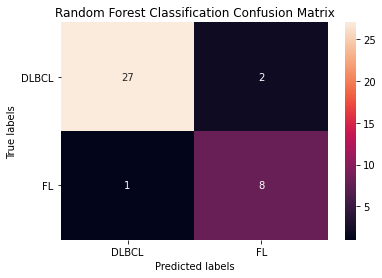

In [62]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_1, y_test_pred_14), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Classification Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# CASE 2: Using 70% of the dataset as training set and 30% of the dataset as test set.

# 2.0.Train-Test Split (70:30)

In [63]:
train_set_2, test_set_2 = train_test_split(data_new, test_size = 0.3, random_state = 42)

In [64]:
print(f"Rows in train set: {len(train_set_2)}\nRows in test set: {len(test_set_2)}")

Rows in train set: 53
Rows in test set: 24


In [65]:
train_set_2.head()

Type  X16983_at  X02152_at  M94880_f_at  Z21966_at  J03909_at  D87119_at  \
65     1        224       4705        14043        431       1793       1091   
54     0        147      17268        14552         -8       6459        635   
31     0          9      14625        15976        -31       5844        280   
7      0         91       1030         8796         95       5600       1038   
62     1         88       2004        14907        179       1241       1446   

    HG417-HT417_s_at  M22382_at  L17131_rna1_at  ...  X56494_at  M63138_at  \
65              3681       3835            2821  ...       2799       2746   
54             11085       8760            7671  ...       8362       9942   
31             14388       4565            7602  ...       7900       7077   
7               4063       9394           11191  ...       7898       4841   
62              1378       1921            1738  ...       2565        318   

    Z11793_at  D82348_at  AB002409_at  HG1980-HT2023_at  M14328_s_at  \
65       2705       1157         5664              1912         8499   
54       4109       3085          -22              6362        15067   
31        394       1778          123              3128        14738   
7        1265       3612         7631              3742        12873   
62       1786        474         2367               988         1788   

    J04173_at  X03689_s_at  D78134_at  
65       5075        22779       6028  
54       7278        20081       3927  
31       7646        20078       1582  
7        6991         6122       2148  
62       3412        24722       4018  

[5 rows x 21 columns]

In [66]:
test_set_2.head()

Type  X16983_at  X02152_at  M94880_f_at  Z21966_at  J03909_at  D87119_at  \
4      0         80      18742         5489        -82        824        692   
35     0        113       7207        20028         81      11354        802   
10     0          3       6672         2532        -95       1340        258   
0      0         42      14742         8233        156       6921        318   
45     0        330      19547        15254        -37      10261       3355   

    HG417-HT417_s_at  M22382_at  L17131_rna1_at  ...  X56494_at  M63138_at  \
4               7238      16467            3905  ...       4553       2654   
35             20974       4598            4008  ...       6341      15733   
10              2516      10123           10767  ...       9058       6016   
0               7502       5161            4413  ...       7578       5011   
45             14348      12552           10482  ...      13529       5137   

    Z11793_at  D82348_at  AB002409_at  HG1980-HT2023_at  M14328_s_at  \
4         259       3890          -17              6162        12063   
35       1972       1437         3966              3193        13687   
10        278       5578          199             11882        13887   
0         241       1494           -6              4351        12813   
45       3811       3322         3150             10605        14153   

    J04173_at  X03689_s_at  D78134_at  
4        9711         6962       1180  
35       5876        21195       3751  
10       6986         4657       3410  
0        8286        22040       2072  
45      14080        23908       5293  

[5 rows x 21 columns]

In [67]:
X_train_2 = train_set_2.drop("Type", axis = 1)
y_train_2 = train_set_2["Type"]
X_test_2 = test_set_2.drop("Type", axis = 1)
y_test_2 = test_set_2["Type"]

# 2.1.Confusion Matrix Heatmap of perfect predictions

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

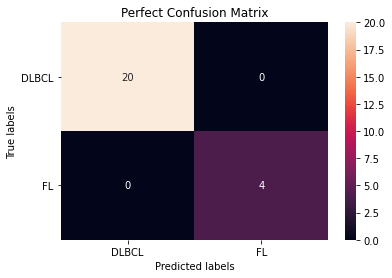

In [68]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_2, y_test_2), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Perfect Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# 2.2.Using Logistic Regression model

In [69]:
model_2 = LogisticRegression(solver='lbfgs', max_iter=500)
model_2.fit(X_train_2, y_train_2)

LogisticRegression(max_iter=500)

In [70]:
lr_score_2 = model_2.score(X_train_2, y_train_2)

In [71]:
print(f"Score: {round((lr_score_2*100), 2)}%")

Score: 100.0%


In [72]:
y_test_pred_2 = model_2.predict(X_test_2)

## 2.2.1.Accuracy, Precision_score, Recall_score, F1_score of the Logistic Regressor

In [73]:
print(f"Accuracy: {round((accuracy_score(y_test_2, y_test_pred_2)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_2, y_test_pred_2)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_2, y_test_pred_2)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_2, y_test_pred_2)*100), 2)}%")

Accuracy: 95.83%
Precision: 80.0%
Recall: 100.0%
F1_score: 88.89%


## 2.2.2.Classification Report of the Logistic Regressor

In [74]:
print(classification_report(y_test_2, y_test_pred_2))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.80      1.00      0.89         4

    accuracy                           0.96        24
   macro avg       0.90      0.97      0.93        24
weighted avg       0.97      0.96      0.96        24



## 2.2.3.Confusion Matrix Heatmap of the Logistic Regressor

In [75]:
confusion_matrix(y_test_2, y_test_pred_2)

array([[19,  1],
       [ 0,  4]], dtype=int64)

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

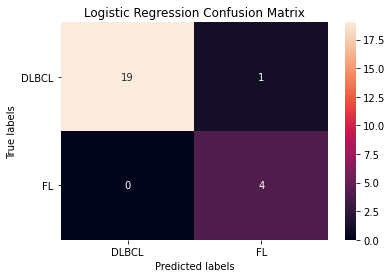

In [76]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_2, y_test_pred_2), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# 2.3.Using SVM model

In [77]:
svm_clf_2 = SVC()
svm_clf_2.fit(X_train_2, y_train_2)

SVC()

In [78]:
svm_score_2 = svm_clf_2.score(X_train_2, y_train_2)

In [79]:
print(f"Score: {round((svm_score_2*100), 2)}%")

Score: 94.34%


In [80]:
y_test_pred_21 = svm_clf_2.predict(X_test_2)

## 2.3.1.Accuracy, Precision_score, Recall_score, F1_score of the SVM model

In [81]:
print(f"Accuracy: {round((accuracy_score(y_test_2, y_test_pred_21)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_2, y_test_pred_21)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_2, y_test_pred_21)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_2, y_test_pred_21)*100), 2)}%")

Accuracy: 95.83%
Precision: 80.0%
Recall: 100.0%
F1_score: 88.89%


## 2.3.2.Classification Report of the SVM model

In [82]:
print(classification_report(y_test_2, y_test_pred_21))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.80      1.00      0.89         4

    accuracy                           0.96        24
   macro avg       0.90      0.97      0.93        24
weighted avg       0.97      0.96      0.96        24



## 2.3.3.Confusion Matrix Heatmap of the SVM model

In [83]:
confusion_matrix(y_test_2, y_test_pred_21)

array([[19,  1],
       [ 0,  4]], dtype=int64)

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

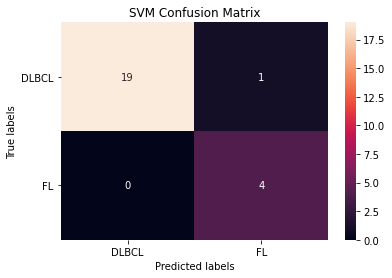

In [84]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_2, y_test_pred_21), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVM Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# 2.4.Using Naive Bayes model

In [85]:
gnb_2 = GaussianNB()
gnb_2.fit(X_train_2, y_train_2)

GaussianNB()

In [86]:
gnb_score_2 = gnb_2.score(X_train_2, y_train_2)

In [87]:
print(f"Score: {round((gnb_score_2*100), 2)}%")

Score: 96.23%


In [88]:
y_test_pred_22 = gnb_2.predict(X_test_2)

## 2.4.1.Accuracy, Precision_score, Recall_score, F1_score of the Naive Bayes model

In [89]:
print(f"Accuracy: {round((accuracy_score(y_test_2, y_test_pred_22)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_2, y_test_pred_22)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_2, y_test_pred_22)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_2, y_test_pred_22)*100), 2)}%")

Accuracy: 95.83%
Precision: 80.0%
Recall: 100.0%
F1_score: 88.89%


## 2.4.2.Classification Report of the Naive Bayes model

In [90]:
print(classification_report(y_test_2, y_test_pred_22))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.80      1.00      0.89         4

    accuracy                           0.96        24
   macro avg       0.90      0.97      0.93        24
weighted avg       0.97      0.96      0.96        24



## 2.4.3.Confusion Matrix Heatmap of the Naive Bayes model

In [91]:
confusion_matrix(y_test_2, y_test_pred_22)

array([[19,  1],
       [ 0,  4]], dtype=int64)

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

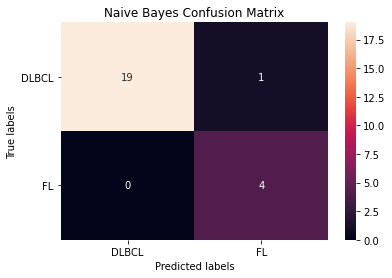

In [92]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_2, y_test_pred_22), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Naive Bayes Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# 2.5.Using XGBoost model

In [93]:
xgb_clf_2 = XGBClassifier(use_label_encoder = False, eval_metric='mlogloss')
xgb_clf_2.fit(X_train_2, y_train_2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [94]:
xgb_score_2 = xgb_clf_2.score(X_train_2, y_train_2)

In [95]:
print(f"Score: {round((xgb_score_2*100), 2)}%")

Score: 100.0%


In [96]:
y_test_pred_23 = xgb_clf_2.predict(X_test_2)

## 2.5.1.Accuracy, Precision_score, Recall_score, F1_score of the XGBoost model

In [97]:
print(f"Accuracy: {round((accuracy_score(y_test_2, y_test_pred_23)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_2, y_test_pred_23)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_2, y_test_pred_23)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_2, y_test_pred_23)*100), 2)}%")

Accuracy: 83.33%
Precision: 50.0%
Recall: 25.0%
F1_score: 33.33%


## 2.5.2.Classification Report of the XGBoost model

In [98]:
print(classification_report(y_test_2, y_test_pred_23))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.50      0.25      0.33         4

    accuracy                           0.83        24
   macro avg       0.68      0.60      0.62        24
weighted avg       0.80      0.83      0.81        24



## 2.5.3.Confusion Matrix Heatmap of the XGBoost model

In [99]:
confusion_matrix(y_test_2, y_test_pred_23)

array([[19,  1],
       [ 3,  1]], dtype=int64)

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

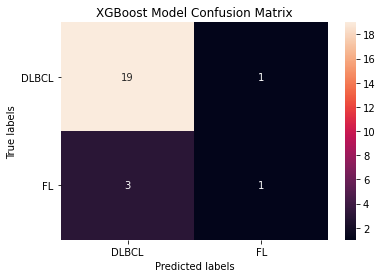

In [100]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_2, y_test_pred_23), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('XGBoost Model Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# 2.6.Using Random Forest Classifier

In [101]:
rfc_clf_2 = RandomForestClassifier(max_depth = 2, random_state = 0)
rfc_clf_2.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=2, random_state=0)

In [102]:
rfc_score_2 = rfc_clf_2.score(X_train_2, y_train_2)

In [103]:
print(f"Score: {round((rfc_score_2*100), 2)}%")

Score: 100.0%


In [104]:
y_test_pred_24 = rfc_clf_2.predict(X_test_2)

## 2.6.1.Accuracy, Precision_score, Recall_score, F1_score of this Random Forest Classifier

In [105]:
print(f"Accuracy: {round((accuracy_score(y_test_2, y_test_pred_24)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_2, y_test_pred_24)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_2, y_test_pred_24)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_2, y_test_pred_24)*100), 2)}%")

Accuracy: 87.5%
Precision: 66.67%
Recall: 50.0%
F1_score: 57.14%


## 2.6.2.Classification Report of this Random Forest Classifier

In [106]:
print(classification_report(y_test_2, y_test_pred_24))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.67      0.50      0.57         4

    accuracy                           0.88        24
   macro avg       0.79      0.72      0.75        24
weighted avg       0.87      0.88      0.87        24



## 2.6.3.Confusion Matrix Heatmap of this Random Forest Classifier

In [107]:
confusion_matrix(y_test_2, y_test_pred_24)

array([[19,  1],
       [ 2,  2]], dtype=int64)

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

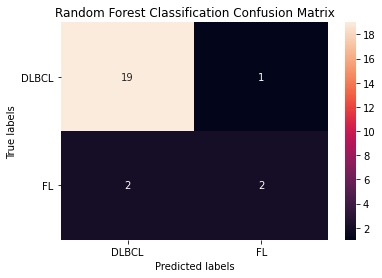

In [108]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_2, y_test_pred_24), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Classification Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# CASE 3: Using 80% of the dataset as training set and 20% of the dataset as test set.

# 3.0.Train-Test Split (80:20)

In [109]:
train_set_3, test_set_3 = train_test_split(data_new, test_size = 0.2, random_state = 42)

In [110]:
print(f"Rows in train set: {len(train_set_3)}\nRows in test set: {len(test_set_3)}")

Rows in train set: 61
Rows in test set: 16


In [111]:
train_set_3.head()

Type  X16983_at  X02152_at  M94880_f_at  Z21966_at  J03909_at  D87119_at  \
9      0        -12      14099        14676        158      13139        468   
5      0        -42      11217        13856         42      14710        427   
34     0         -9       6553         5840         70       3728        259   
22     0         86      13342         8043        139       3660        784   
30     0         66      17953        14176        200      11388        638   

    HG417-HT417_s_at  M22382_at  L17131_rna1_at  ...  X56494_at  M63138_at  \
9              18791       5627           10307  ...      12693      13274   
5              17948       8072            9065  ...      13584      15061   
34              4196       6913            8075  ...       4342       3751   
22              5362       8189            3361  ...       1974       2885   
30             13995       9200            9770  ...      12238       7393   

    Z11793_at  D82348_at  AB002409_at  HG1980-HT2023_at  M14328_s_at  \
9        1684       4208          197              7998        12985   
5         266       2875          441              5183        14997   
34        127       3662          543              6979         8566   
22       1441       1458          143              6337         6163   
30       1744       3468           41              7450        14341   

    J04173_at  X03689_s_at  D78134_at  
9        6930           77       2812  
5        9419         1408       2847  
34       4786         -552       2466  
22       6145        21943       1628  
30      12791        21960       1361  

[5 rows x 21 columns]

In [112]:
test_set_3.head()

Type  X16983_at  X02152_at  M94880_f_at  Z21966_at  J03909_at  D87119_at  \
4      0         80      18742         5489        -82        824        692   
35     0        113       7207        20028         81      11354        802   
10     0          3       6672         2532        -95       1340        258   
0      0         42      14742         8233        156       6921        318   
45     0        330      19547        15254        -37      10261       3355   

    HG417-HT417_s_at  M22382_at  L17131_rna1_at  ...  X56494_at  M63138_at  \
4               7238      16467            3905  ...       4553       2654   
35             20974       4598            4008  ...       6341      15733   
10              2516      10123           10767  ...       9058       6016   
0               7502       5161            4413  ...       7578       5011   
45             14348      12552           10482  ...      13529       5137   

    Z11793_at  D82348_at  AB002409_at  HG1980-HT2023_at  M14328_s_at  \
4         259       3890          -17              6162        12063   
35       1972       1437         3966              3193        13687   
10        278       5578          199             11882        13887   
0         241       1494           -6              4351        12813   
45       3811       3322         3150             10605        14153   

    J04173_at  X03689_s_at  D78134_at  
4        9711         6962       1180  
35       5876        21195       3751  
10       6986         4657       3410  
0        8286        22040       2072  
45      14080        23908       5293  

[5 rows x 21 columns]

In [113]:
X_train_3 = train_set_3.drop("Type", axis = 1)
y_train_3 = train_set_3["Type"]
X_test_3 = test_set_3.drop("Type", axis = 1)
y_test_3 = test_set_3["Type"]

# 3.1.Confusion Matrix Heatmap of perfect predictions

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

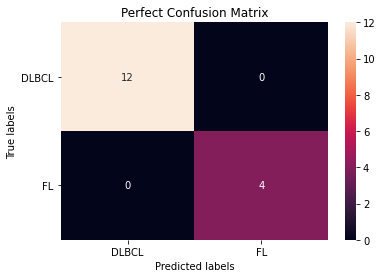

In [114]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_3, y_test_3), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Perfect Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# 3.2.Using Logistic Regression model

In [115]:
model_3 = LogisticRegression(solver='lbfgs', max_iter=500)
model_3.fit(X_train_3, y_train_3)

LogisticRegression(max_iter=500)

In [116]:
lr_score_3 = model_3.score(X_train_3, y_train_3)

In [117]:
print(f"Score: {round((lr_score_3*100), 2)}%")

Score: 100.0%


In [118]:
y_test_pred_3 = model_3.predict(X_test_3)

## 3.2.1.Accuracy, Precision_score, Recall_score, F1_score of the Logistic Regressor

In [119]:
print(f"Accuracy: {round((accuracy_score(y_test_3, y_test_pred_3)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_3, y_test_pred_3)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_3, y_test_pred_3)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_3, y_test_pred_3)*100), 2)}%")

Accuracy: 93.75%
Precision: 80.0%
Recall: 100.0%
F1_score: 88.89%


## 3.2.2.Classification Report of the Logistic Regressor

In [120]:
print(classification_report(y_test_3, y_test_pred_3))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16



## 3.2.3.Confusion Matrix Heatmap of the Logistic Regressor

In [121]:
confusion_matrix(y_test_3, y_test_pred_3)

array([[11,  1],
       [ 0,  4]], dtype=int64)

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

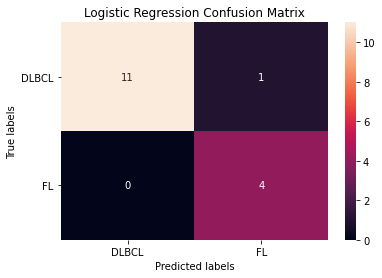

In [122]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_3, y_test_pred_3), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# 3.3.Using SVM model

In [123]:
svm_clf_3 = SVC()
svm_clf_3.fit(X_train_3, y_train_3)

SVC()

In [124]:
svm_score_3 = svm_clf_3.score(X_train_3, y_train_3)

In [125]:
print(f"Score: {round((svm_score_3*100), 2)}%")

Score: 98.36%


In [126]:
y_test_pred_31 = svm_clf_3.predict(X_test_3)

## 3.3.1.Accuracy, Precision_score, Recall_score, F1_score of the SVM model

In [127]:
print(f"Accuracy: {round((accuracy_score(y_test_3, y_test_pred_31)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_3, y_test_pred_31)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_3, y_test_pred_31)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_3, y_test_pred_31)*100), 2)}%")

Accuracy: 93.75%
Precision: 80.0%
Recall: 100.0%
F1_score: 88.89%


## 3.3.2.Classification Report of the SVM model

In [128]:
print(classification_report(y_test_3, y_test_pred_31))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16



## 3.3.3.Confusion Matrix Heatmap of the SVM model

In [129]:
confusion_matrix(y_test_3, y_test_pred_31)

array([[11,  1],
       [ 0,  4]], dtype=int64)

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

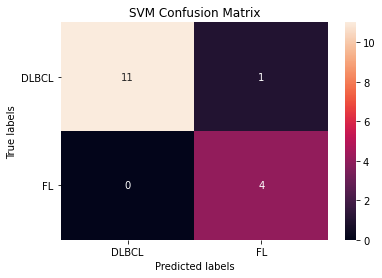

In [130]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_3, y_test_pred_31), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVM Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

# 3.4.Using Naive Bayes model

In [131]:
gnb_3 = GaussianNB()
gnb_3.fit(X_train_3, y_train_3)

GaussianNB()

In [132]:
gnb_score_3 = gnb_3.score(X_train_3, y_train_3)

In [133]:
print(f"Score: {round((gnb_score_3*100), 2)}%")

Score: 96.72%


In [134]:
y_test_pred_32 = gnb_3.predict(X_test_3)

## 3.4.1.Accuracy, Precision_score, Recall_score, F1_score of the Naive Bayes model

In [135]:
print(f"Accuracy: {round((accuracy_score(y_test_3, y_test_pred_32)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_3, y_test_pred_32)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_3, y_test_pred_32)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_3, y_test_pred_32)*100), 2)}%")

Accuracy: 93.75%
Precision: 80.0%
Recall: 100.0%
F1_score: 88.89%


## 3.4.2.Classification Report of the Naive Bayes model

In [136]:
print(classification_report(y_test_3, y_test_pred_32))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16



## 3.4.3.Confusion Matrix Heatmap of the Naive Bayes model

In [137]:
confusion_matrix(y_test_3, y_test_pred_32)

array([[11,  1],
       [ 0,  4]], dtype=int64)

In [138]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_3, y_test_pred_32), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Naive Bayes Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

# 3.5.Using XGBoost model

In [139]:
xgb_clf_3 = XGBClassifier(use_label_encoder = False, eval_metric='mlogloss')
xgb_clf_3.fit(X_train_3, y_train_3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [140]:
xgb_score_3 = xgb_clf_3.score(X_train_3, y_train_3)

In [141]:
print(f"Score: {round((xgb_score_3*100), 2)}%")

Score: 100.0%


In [142]:
y_test_pred_33 = xgb_clf_3.predict(X_test_3)

## 3.5.1.Accuracy, Precision_score, Recall_score, F1_score of the XGBoost model

In [143]:
print(f"Accuracy: {round((accuracy_score(y_test_3, y_test_pred_33)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_3, y_test_pred_33)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_3, y_test_pred_33)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_3, y_test_pred_33)*100), 2)}%")

Accuracy: 81.25%
Precision: 100.0%
Recall: 25.0%
F1_score: 40.0%


## 3.5.2.Classification Report of the XGBoost model

In [144]:
print(classification_report(y_test_3, y_test_pred_33))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.25      0.40         4

    accuracy                           0.81        16
   macro avg       0.90      0.62      0.64        16
weighted avg       0.85      0.81      0.77        16



## 3.5.3.Confusion Matrix Heatmap of the XGBoost model

In [145]:
confusion_matrix(y_test_3, y_test_pred_33)

array([[12,  0],
       [ 3,  1]], dtype=int64)

In [146]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_3, y_test_pred_33), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('XGBoost Model Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]

# 3.6.Using Random Forest Classifier

In [147]:
rfc_clf_3 = RandomForestClassifier(max_depth = 2, random_state = 0)
rfc_clf_3.fit(X_train_3, y_train_3)

RandomForestClassifier(max_depth=2, random_state=0)

In [148]:
rfc_score_3 = rfc_clf_3.score(X_train_1, y_train_1)

In [149]:
print(f"Score: {round((rfc_score_3*100), 2)}%")

Score: 100.0%


In [150]:
y_test_pred_34 = rfc_clf_3.predict(X_test_3)

## 3.6.1.Accuracy, Precision_score, Recall_score, F1_score of this Random Forest Classifier

In [151]:
print(f"Accuracy: {round((accuracy_score(y_test_3, y_test_pred_34)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_3, y_test_pred_34)*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_3, y_test_pred_34)*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_3, y_test_pred_34)*100), 2)}%")

Accuracy: 81.25%
Precision: 66.67%
Recall: 50.0%
F1_score: 57.14%


## 3.6.2.Classification Report of this Random Forest Classifier

In [152]:
print(classification_report(y_test_3, y_test_pred_34))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.67      0.50      0.57         4

    accuracy                           0.81        16
   macro avg       0.76      0.71      0.73        16
weighted avg       0.80      0.81      0.80        16



## 3.6.3.Confusion Matrix Heatmap of this Random Forest Classifier

In [153]:
confusion_matrix(y_test_3, y_test_pred_34)

array([[11,  1],
       [ 2,  2]], dtype=int64)

In [154]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_3, y_test_pred_34), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Classification Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

[Text(0, 0.5, 'DLBCL'), Text(0, 1.5, 'FL')]